In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
from collections import Counter
from statistics import mode
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [0]:
train=pd.read_csv('/content/drive/My Drive/Titanic/train.csv')
test=pd.read_csv('/content/drive/My Drive/Titanic/test.csv')

ID=test.PassengerId

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


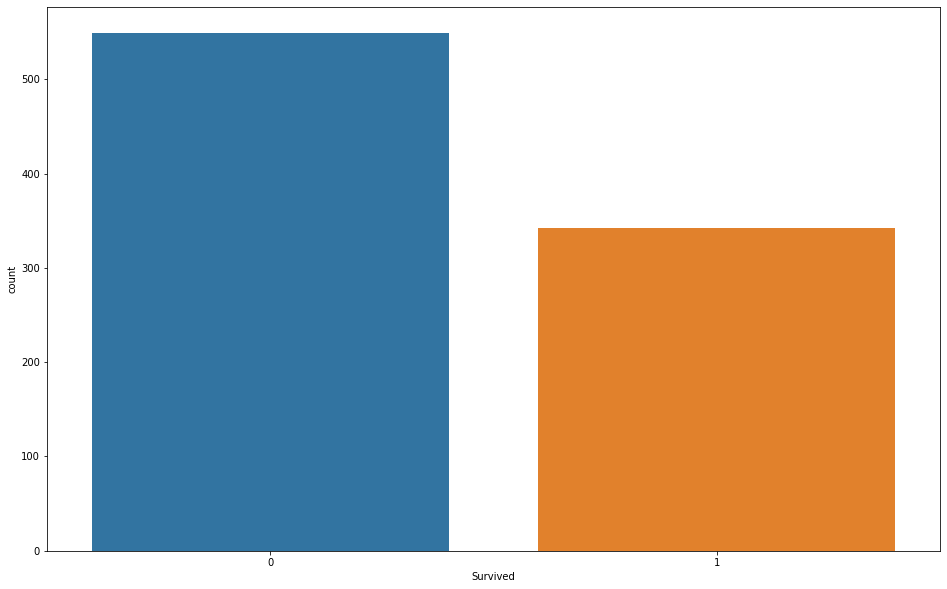

In [0]:
fig=plt.figure(figsize=(16,10))
sns.countplot(train['Survived'],data=train)

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


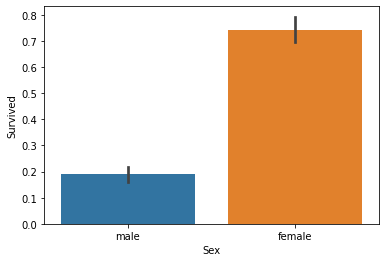

In [0]:
sns.barplot(x="Sex",y="Survived",data=train)

print("Percentage of females who survived:",train["Survived"][train["Sex"]=='female'].value_counts(normalize=True)[1]*100)

print("Percentage of males who survived:",train["Survived"][train["Sex"]=='male'].value_counts(normalize=True)[1]*100)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


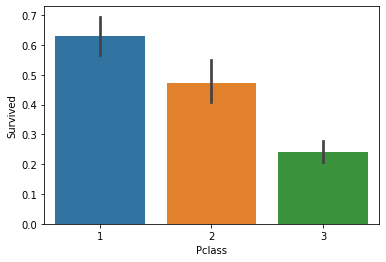

In [0]:
sns.barplot(x="Pclass", y="Survived", data=train)

print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


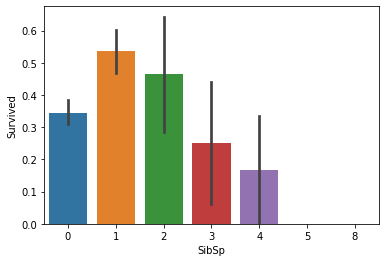

In [0]:
sns.barplot(x="SibSp", y="Survived", data=train)

print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

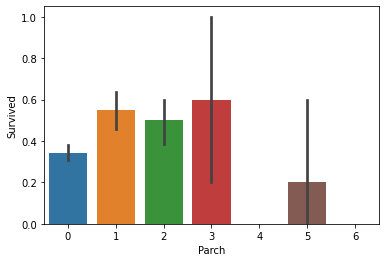

In [0]:
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

In [0]:
dataset = pd.concat([train, test], sort=False, ignore_index=True)

In [0]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
dataset.isnull().mean().sort_values(ascending=False)

Cabin          0.774637
Survived       0.319328
Age            0.200917
Embarked       0.001528
Fare           0.000764
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
PassengerId    0.000000
dtype: float64

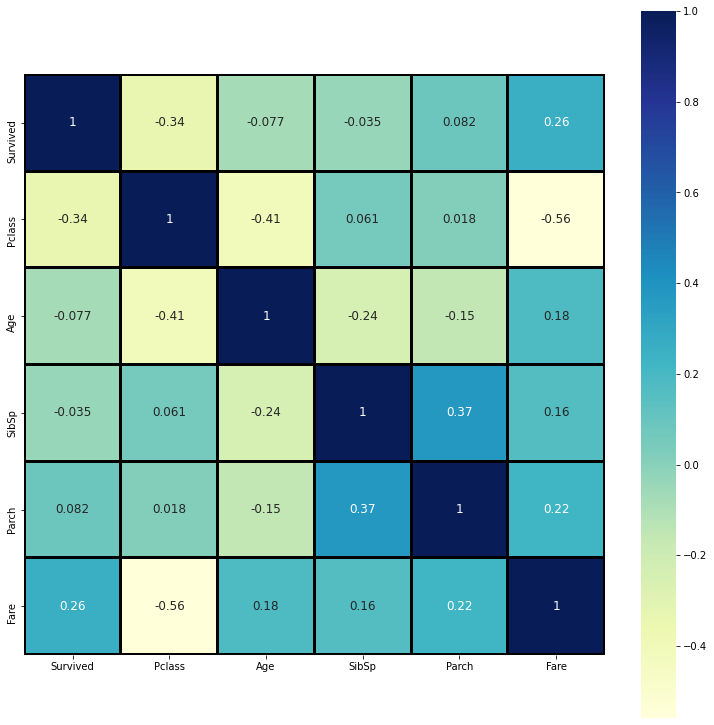

In [0]:
fig, axs = plt.subplots(nrows=1, figsize=(13, 13))
sns.heatmap(dataset.drop(['PassengerId'], axis=1).corr(), annot=True, square=True, cmap='YlGnBu', linewidths=2, linecolor='black', annot_kws={'size':12})

In [0]:
dataset.isnull().mean().sort_values(ascending=False)

Cabin          0.774637
Survived       0.319328
Age            0.200917
Embarked       0.001528
Fare           0.000764
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
PassengerId    0.000000
dtype: float64

In [0]:
dataset['Fare'].corr(dataset['Pclass'])

-0.5586287323271729

In [0]:
med_fare = dataset.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]

dataset['Fare'] = dataset['Fare'].fillna(med_fare)

In [0]:
dataset.isnull().mean().sort_values(ascending=False)

Cabin          0.774637
Survived       0.319328
Age            0.200917
Embarked       0.001528
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
PassengerId    0.000000
dtype: float64

In [0]:
dataset['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [0]:
dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [0]:
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
dataset['Title'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer',
 'Dona']

In [0]:
dataset['Title'].value_counts(normalize=True)*100

Mr          57.830405
Miss        19.862490
Mrs         15.049656
Master       4.660046
Rev          0.611154
Dr           0.611154
Col          0.305577
Ms           0.152788
Mlle         0.152788
Major        0.152788
Dona         0.076394
Countess     0.076394
Jonkheer     0.076394
Sir          0.076394
Don          0.076394
Capt         0.076394
Lady         0.076394
Mme          0.076394
Name: Title, dtype: float64

In [0]:
title_mapping = {'Mr': 0, 'Mrs': 0, 'Miss': 0, 'Master' : 1,'Don': 1, 'Rev' : 1,'Dr' : 1,'Mme': 0, 'Ms': 0, 'Major': 1,
 'Lady': 1, 'Sir': 1, 'Mlle': 0, 'Col': 1, 'Capt': 1, 'Countess': 1, 'Jonkheer': 1,'Dona': 1,}
 
dataset['Title'] = dataset['Title'].map(title_mapping)
dataset['Title'] = dataset['Title'].fillna(0)
dataset['Title'].value_counts()

0    1219
1      90
Name: Title, dtype: int64

In [0]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [0]:
dataset['Age'] = dataset.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [0]:
dataset=dataset.drop(['Ticket','Name','Cabin'],axis=1)

In [0]:
sex_mapping = {'male':0, 'female':1}
dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [0]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


In [0]:
dataset['SibSp'].corr(dataset['Parch'])

0.3735871906264925

In [0]:
dataset['Parch'].corr(dataset['SibSp'])

0.3735871906264925

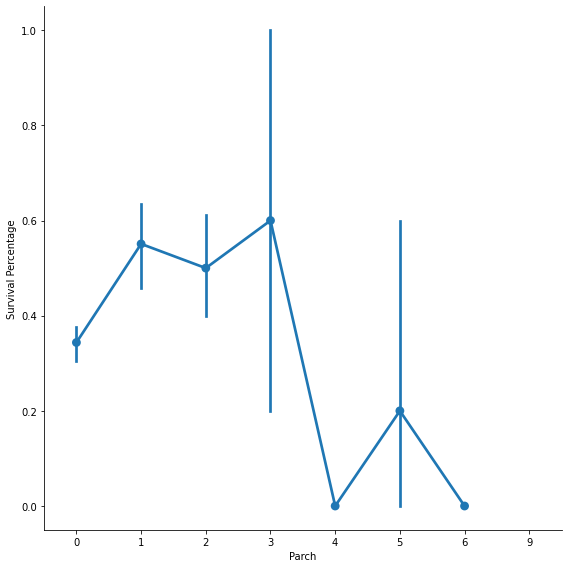

In [0]:
g  = sns.factorplot(x="Parch",y="Survived",data=dataset, size = 8)
g = g.set_ylabels("Survival Percentage")

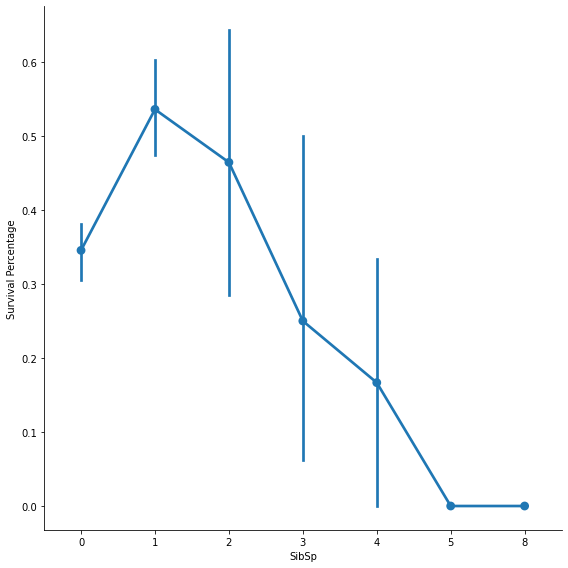

In [0]:
g  = sns.factorplot(x="SibSp",y="Survived",data=dataset, size = 8)
g = g.set_ylabels("Survival Percentage")

In [0]:
dataset['FamSize'] = dataset['SibSp'] + dataset['Parch'] + 1

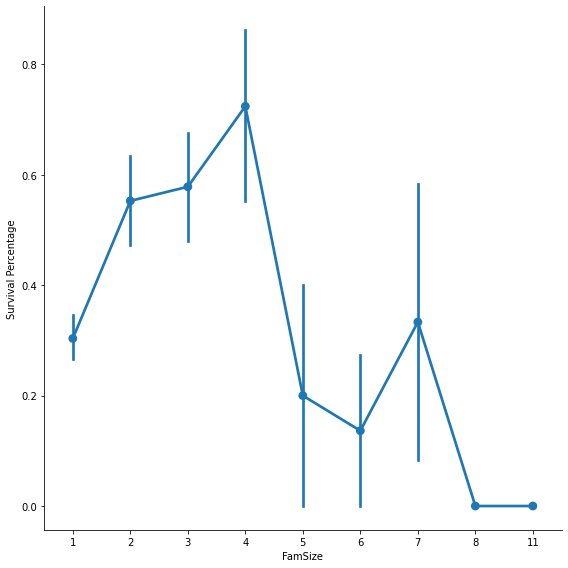

In [0]:
g  = sns.factorplot(x="FamSize",y="Survived",data=dataset, size = 8)
g = g.set_ylabels("Survival Percentage")

In [0]:
dataset['Single'] = dataset['FamSize'].map(lambda s: 1 if s == 1 else 0)
dataset['SmallF'] = dataset['FamSize'].map(lambda s: 1 if  s == 2  else 0)
dataset['MedF'] = dataset['FamSize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
dataset['LargeF'] = dataset['FamSize'].map(lambda s: 1 if s >= 5 else 0)

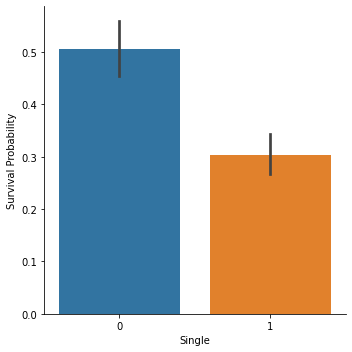

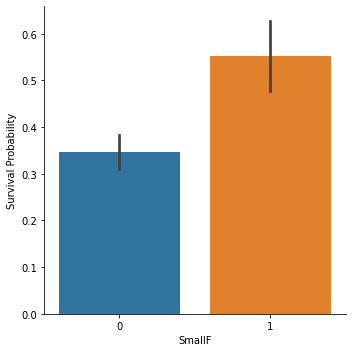

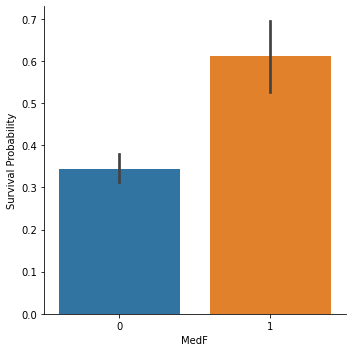

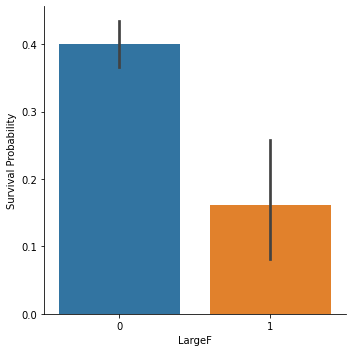

In [0]:
g = sns.factorplot(x="Single",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="SmallF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="MedF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="LargeF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")

In [0]:
features = ['Survived', 'Embarked', 'Pclass', 'Sex', 'Title', 'FamSize', 'Single', 'SmallF', 'MedF', 'LargeF', 'Fare', 'Age']
dataset = dataset[features]
dataset.head()

,Survived,Embarked,Pclass,Sex,Title,FamSize,Single,SmallF,MedF,LargeF,Fare,Age
0,0.0,S,3,0,0,2,0,1,0,0,7.2500,22.0
1,1.0,C,1,1,0,2,0,1,0,0,71.2833,38.0
2,1.0,S,3,1,0,1,1,0,0,0,7.9250,26.0
3,1.0,S,1,1,0,2,0,1,0,0,53.1000,35.0
4,0.0,S,3,0,0,1,1,0,0,0,8.0500,35.0


In [0]:
dataset = pd.get_dummies(dataset, columns = ["Title", "Embarked"])

In [0]:
train=dataset[:len(train)]

test=dataset[len(train):]

test.drop(labels=['Survived'], axis=1, inplace=True)

In [0]:
train.head()

,Survived,Pclass,Sex,FamSize,Single,SmallF,MedF,LargeF,Fare,Age,Title_0,Title_1,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,0,2,0,1,0,0,7.2500,22.0,1,0,0,0,1
1,1.0,1,1,2,0,1,0,0,71.2833,38.0,1,0,1,0,0
2,1.0,3,1,1,1,0,0,0,7.9250,26.0,1,0,0,0,1
3,1.0,1,1,2,0,1,0,0,53.1000,35.0,1,0,0,0,1
4,0.0,3,0,1,1,0,0,0,8.0500,35.0,1,0,0,0,1


In [0]:
test.head()

,Pclass,Sex,FamSize,Single,SmallF,MedF,LargeF,Fare,Age,Title_0,Title_1,Embarked_C,Embarked_Q,Embarked_S
891,3,0,1,1,0,0,0,7.8292,34.5,1,0,0,1,0
892,3,1,2,0,1,0,0,7.0000,47.0,1,0,0,0,1
893,2,0,1,1,0,0,0,9.6875,62.0,1,0,0,1,0
894,3,0,1,1,0,0,0,8.6625,27.0,1,0,0,0,1
895,3,1,3,0,0,1,0,12.2875,22.0,1,0,0,0,1


In [0]:
train.Survived=train.Survived.astype('int')

In [0]:
from sklearn.model_selection import train_test_split

y=train.Survived
x=train.drop('Survived',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [0]:
model=RandomForestClassifier(n_estimators=1100,criterion='gini',random_state=0)

model.fit(x_train,y_train)

predict=model.predict(x_test)

print("Accuracy:",accuracy_score(predict,y_test))

Accuracy: 0.7932960893854749


In [0]:
finale=model.predict(test)

output = pd.DataFrame({'PassengerId': ID, 'Survived':finale})
output.to_csv('/content/drive/My Drive/Titanic/submission.csv', index=False)